[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/4_1_Regression_Estimation.ipynb)


Load and view the linnerud data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud

# Load the Linnerud dataset as a DataFrame
linnerud = load_linnerud(as_frame=True)
print(linnerud.data)
print(linnerud.target)


    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0
    Weight  Waist  Pulse
0    191.0   36.0   50.0
1    189.0   37.0   52.0
2    193.0   38.0   58.0
3    162.0   35.0   62.0
4    189.0   35.0   46.0
5    182.0   36.0   56.0
6    211.0   38.0   56.0
7    167.0   34.0   60.0
8    176.0   31.0   74.0
9    154.0   33.0   56.0
10   169.0   34.0   50.0
11   166.0   33.0   52.0
12   154.0   34.0   64.0
13   247.0   46.0   50.0
14   193.0   36.0   46.0
15   202.0   37.0   62.0
16   176.0   37.0   54.0
17   157.0   32.0   52.0


View the data as a scatterplot

Basic Statistics:
X (Chins) mean: 9.45
Y (Weight) mean: 178.60


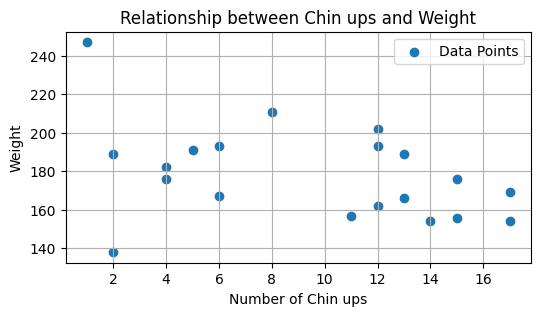

In [2]:

# Extract 'Chins' feature for the x-axis and 'Weight' target for the y-axis
x = linnerud.data['Chins']
y = linnerud.target['Weight']

# Display basic statistics for the data
print("Basic Statistics:")
print(f"X (Chins) mean: {np.mean(x):.2f}")
print(f"Y (Weight) mean: {np.mean(y):.2f}")

# Initialize the scatter plot with a specific figure size
plt.figure(figsize=(6, 3))

# Create a scatter plot to visualize the relationship between 'Chins' and 'Weight'
plt.scatter(x, y, label='Data Points')

# Add title and axis labels for better interpretability
plt.title('Relationship between Chin ups and Weight')
plt.xlabel('Number of Chin ups')
plt.ylabel('Weight')

# Show legend to identify different parts of the plot
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


Estimate Beta_0 and Beta_1.

In [3]:
# x must be in a certain format for the regression formulas
x = pd.DataFrame({"Chins":linnerud.data.Chins})

# Import regression libraries
from sklearn.linear_model import LinearRegression

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(x,y)

# Print the intercept
print('intercept:', mod_reg.intercept_)

# Print the Slope:
print('slope:', mod_reg.coef_)


intercept: 195.80026367831246
slope: [-1.82013372]


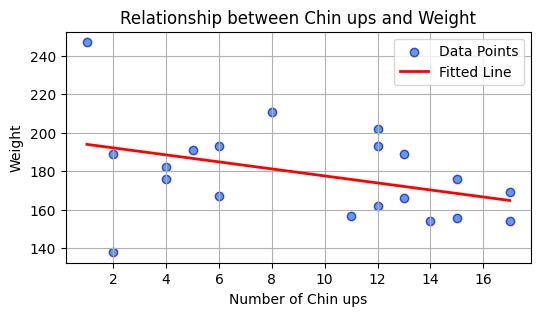

In [4]:
# Beta_0 is the intercept
Beta_0 = mod_reg.intercept_
#Beta_1 is the slope
Beta_1 = mod_reg.coef_

# Initialize the scatter plot with a specific figure size
plt.figure(figsize=(6,3))

# Plot the actual data points as a scatter plot
plt.scatter(x, y, label='Data Points', alpha=0.7, edgecolors='b')

# Generate x-axis values for plotting the regression line
x_axis = np.linspace(min(x.values), max(x.values), 400)

# Plot the fitted linear regression line
plt.plot(x_axis, Beta_0 + Beta_1 * x_axis, label='Fitted Line', linewidth=2, color='r')

# Add title, labels, and legend to the plot
plt.title('Relationship between Chin ups and Weight')
plt.xlabel('Number of Chin ups')
plt.ylabel('Weight')
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


What is we consider all the predictors

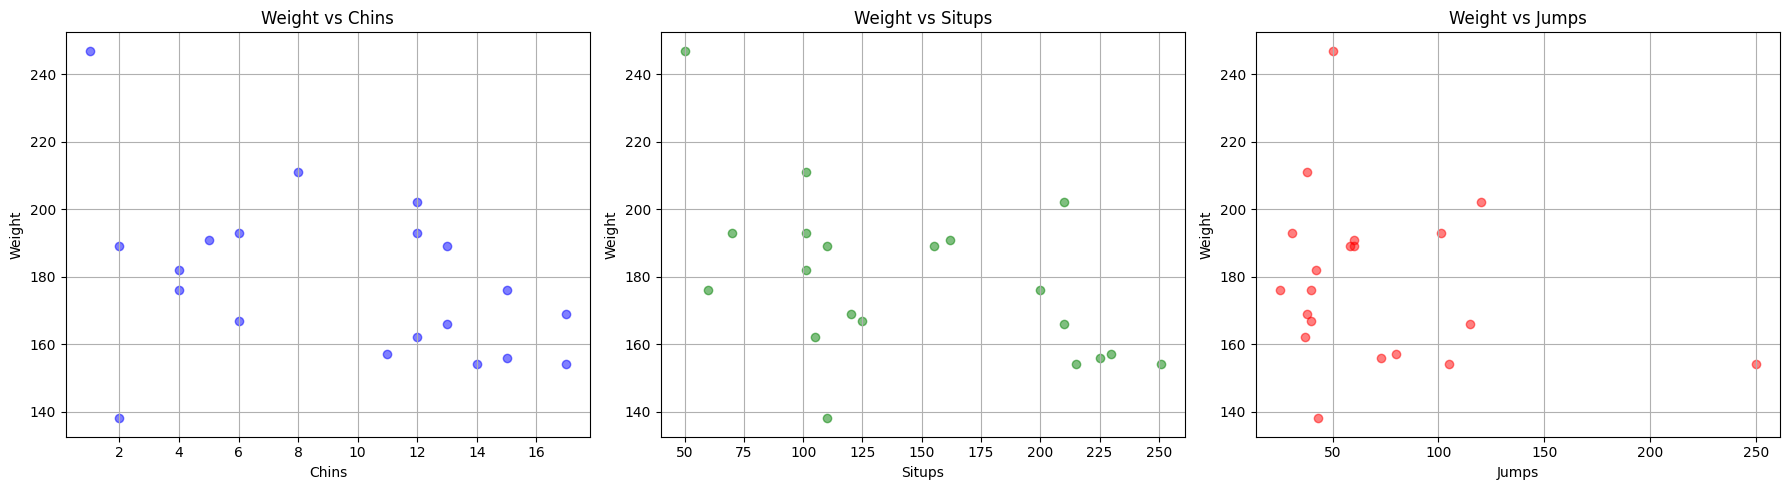

In [5]:
# Create side-by-side scatter plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for Chins vs Weight
axs[0].scatter(linnerud.data['Chins'], linnerud.target['Weight'], color='blue', alpha=0.5)
axs[0].set_title('Weight vs Chins')
axs[0].set_xlabel('Chins')
axs[0].set_ylabel('Weight')
axs[0].grid(True)

# Scatter plot for Situps vs Weight
axs[1].scatter(linnerud.data['Situps'], linnerud.target['Weight'], color='green', alpha=0.5)
axs[1].set_title('Weight vs Situps')
axs[1].set_xlabel('Situps')
axs[1].set_ylabel('Weight')
axs[1].grid(True)

# Scatter plot for Jumps vs Weight
axs[2].scatter(linnerud.data['Jumps'], linnerud.target['Weight'], color='red', alpha=0.5)
axs[2].set_title('Weight vs Jumps')
axs[2].set_xlabel('Jumps')
axs[2].set_ylabel('Weight')
axs[2].grid(True)

plt.tight_layout()
plt.show()






Perform multiple regression using all the predictors

In [6]:
# Extract predictors 'Chins', 'Situps', and 'Jumps' and target 'Weight'
X = linnerud.data[['Chins', 'Situps', 'Jumps']]
y = linnerud.target['Weight']
X

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [7]:


# Extract predictors 'Chins', 'Situps', and 'Jumps' and target 'Weight'
X = linnerud.data[['Chins', 'Situps', 'Jumps']]
y = linnerud.target['Weight']

# Initialize a multiple linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Display the intercept and coefficients
print('Intercept (Beta_0):', model.intercept_)
print('Coefficient for Chins (Beta_1):', model.coef_[0])
print('Coefficient for Situps (Beta_2):', model.coef_[1])
print('Coefficient for Jumps (Beta_3):', model.coef_[2])


Intercept (Beta_0): 208.2335188069604
Coefficient for Chins (Beta_1): -0.4750263586638008
Coefficient for Situps (Beta_2): -0.21771646975131492
Coefficient for Jumps (Beta_3): 0.09308837062185482


### Interpretations of the Regression Coefficients:

1. **Intercept $( \beta_0 )$: 208.23**
   
   - *Interpretation*: When the number of `Chins`, `Situps`, and `Jumps` are all zero, the predicted weight (perhaps a baseline weight) is approximately 208.23 units. This is a theoretical interpretation since in reality, it's unlikely for all three exercises to have zero counts, especially in the context of the dataset.

2. **Coefficient for Chins ($ \beta_1 $): -0.475**
   
   - *Interpretation*: Holding the counts for `Situps` and `Jumps` constant, for every additional `Chin` repetition, the predicted weight decreases by approximately 0.475 units. This suggests that there is an inverse relationship between the number of `Chins` and `Weight`.

3. **Coefficient for Situps ($ \beta_2 $): -0.217**
   
   - *Interpretation*: Holding the counts for `Chins` and `Jumps` constant, for every additional `Situp` repetition, the predicted weight decreases by approximately 0.217 units. Similarly, there's an inverse relationship between the number of `Situps` and `Weight`.

4. **Coefficient for Jumps ($ \beta_3 $): 0.093**
   
   - *Interpretation*: Holding the counts for `Chins` and `Situps` constant, for every additional `Jump`, the predicted weight increases by approximately 0.093 units. This suggests a positive relationship between the number of `Jumps` and `Weight`, does that make sense?
  
